In [22]:
import datasetinsights
from datasetinsights import *
from datasetinsights.datasets.unity_perception import Captures
from datasetinsights.datasets.unity_perception import AnnotationDefinitions, MetricDefinitions
from datasetinsights.datasets.unity_perception import Metrics
import matplotlib.pyplot as plt
import datasetinsights.datasets.unity_perception.metrics as metrics
from datasetinsights.datasets.unity_perception.exceptions import DefinitionIDError
from datasetinsights.stats import bar_plot, histogram_plot, rotation_plot
import pandas as pd

In [ ]:
data_root = "<GeneratedWaterSegmentationDataset_Path>" 
scenes = ['1_Generated_Dataset_CityScene_Updated', '2_Generated_Dataset_ForestScene_Updated',
          '3_Generated_Dataset_ForestSceneWaterfalls', '4_LakeDamScene',
          '5_Generated_Dataset_SnowScene', '6_Generated_Dataset_CitySceneBridge_Updated',
          '7_Generated_Dataset_CitySceneBridgeFlooded', '8_Generated_Dataset_Bridge_Pavement',
          '9_Generated_Dataset_RiverScene', '10_Generated_Dataset_CityFloodedScene',
          '11_Generated_Dataset_TerrainSceneURPupdated'] # , '12_Generated_Dataset_TestDataset

data = pd.DataFrame()
for scene in scenes:
    print("Scene: " + scene)
    data_dir = data_root + scene
    captures = Captures(data_root=data_dir)
    scene_data = captures.filter(def_id="semantic segmentation")
    print(scene_data[:3][:6])

    # print(scene_data.describe())
    data = pd.concat([data, scene_data])
    # data.append(scene_data)
    
# # df = pd.DataFrame(data)
print("Number of frames: " + str(len(data)))
print(data[:3][:6])
# # print(data.describe())

In [65]:
captures = Captures(data_root=data_root + 'Generated_Dataset_TerrainSceneURP')
data = captures.filter(def_id="semantic segmentation") # noqa E501 table command not be broken down into multiple lines
#return the captures and annotations filtered by the annotation
# data.dropna(inplace=False)
print(data[:3][:6])
print(type(data))
print(len(data))
# captures_1 = Captures(data_root=data_root + '1_Generated_Dataset_CityScene_Updated')
# data_1 = captures_1.filter(def_id = "semantic segmentation")
# # data_all = pd.concat([data, data_1])
# data_1.describe()

                                     id                           sequence_id  \
0  05f5bd65-74d2-4c04-b57d-48f74a0dc9de  eb0fcf91-f675-4b2a-b0f7-14336c2c9ae0   
1  02488c15-c306-4b17-bc4d-f94dc81b5476  ec0fcf91-f675-4b2a-b0f7-14336c2c9ae0   
2  1b83b7e7-257e-430a-85cf-367e60f4d0b1  ed0fcf91-f675-4b2a-b0f7-14336c2c9ae0   

   step  timestamp                                             sensor  \
0     1     0.0166  {'sensor_id': 'cameraG', 'ego_id': 'ego', 'mod...   
1     1     0.0166  {'sensor_id': 'cameraG', 'ego_id': 'ego', 'mod...   
2     1     0.0166  {'sensor_id': 'cameraG', 'ego_id': 'ego', 'mod...   

                                                 ego  \
0  {'ego_id': 'ego', 'translation': [0.0, 0.0, 0....   
1  {'ego_id': 'ego', 'translation': [0.0, 0.0, 0....   
2  {'ego_id': 'ego', 'translation': [0.0, 0.0, 0....   

                                            filename format  \
0  RGBf5411fd4-1845-40a0-beaa-fd2567ea861b/rgb_60...    PNG   
1  RGBf5411fd4-1845-40a0-beaa-f

In [72]:
def annotations_from_attribute(annotations, attribute):
    # annotations = data['annotations']
    annotations_attr = [None] * len(annotations)
    for i in range(len(annotations)):
        ann = annotations[i]
        annotation = [y for y in ann if attribute in y][0]
        # print(annotation)
        annotations_attr[i] = annotation
        
    return annotations_attr


def create_bar_chart(annotations_attr, attribute): 
    # values = annotations_attr.apply(lambda x: [x.get(attribute)]).tolist()
    values = [elem.get(attribute) for elem in annotations_attr]
    # values = [item for sublist in values for item in sublist]
    
    bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
    n, bins, patches = plt.hist(values, bins=bins, rwidth=0.75)
    # Iterate over the values and patches to add labels
#     for value, patch in zip(n, patches):
#         x = patch.get_x() + patch.get_width() / 2
#         y = patch.get_height()
#         plt.text(x, y, value, ha='center', va='bottom')
    plt.xlabel(attribute + ' Values')
    plt.ylabel('Count')
    plt.title('Histogram of ' + attribute + ' Values')
    plt.show()

    
def create_bar_chart_posteffects(annotations_attr, attribute): 
    # values = annotations_attr.apply(lambda x: [x.get(attribute)]).tolist()
    values = [elem.get(attribute) for elem in annotations_attr]
    # print(len(values))
    # values = [item for sublist in values for item in sublist]
    from collections import Counter
    values_count = Counter(values)
    df = pd.DataFrame.from_dict(values_count, orient='index')
    df.plot(kind='bar', title='Post Effects')

#     bins = ['none','Bloom', 'DepthOfField', 'b&w', 'IsoNoise', 'Raindrops']
#     plt.hist(values_count, bins=bins, rwidth=0.75)
#     plt.xlabel(attribute + ' Values')
#     plt.ylabel('Count')
#     plt.title('Histogram of ' + attribute + ' Values')
#     plt.show()


In [73]:
annotations = data['annotations']

attribute: water_color


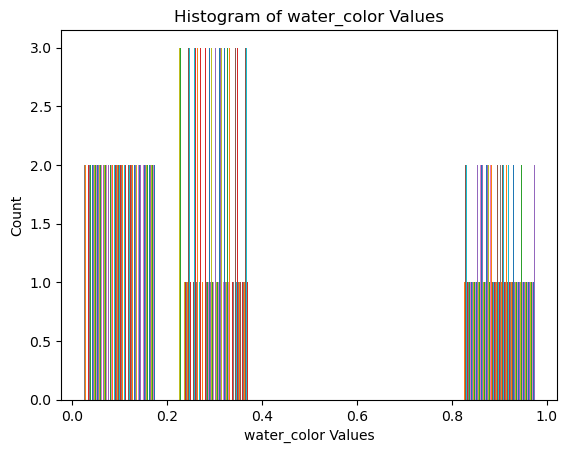

attribute: reflection_intensity


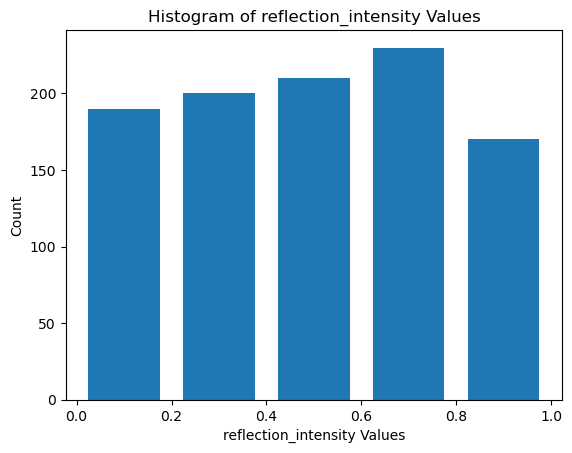

attribute: distortion


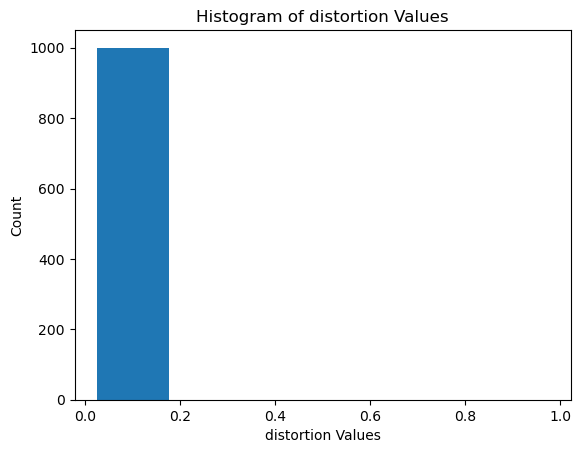

attribute: water_level


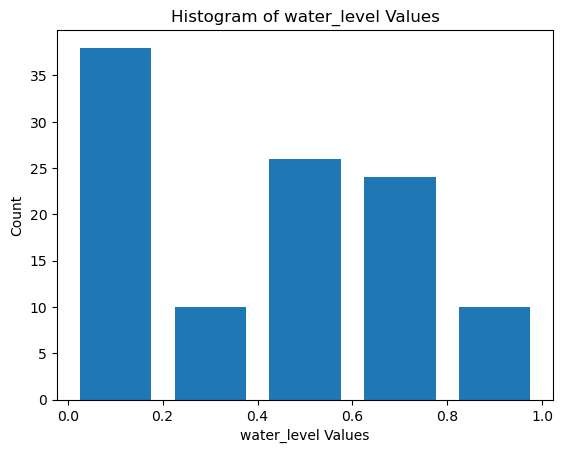

attribute: vertical_depth


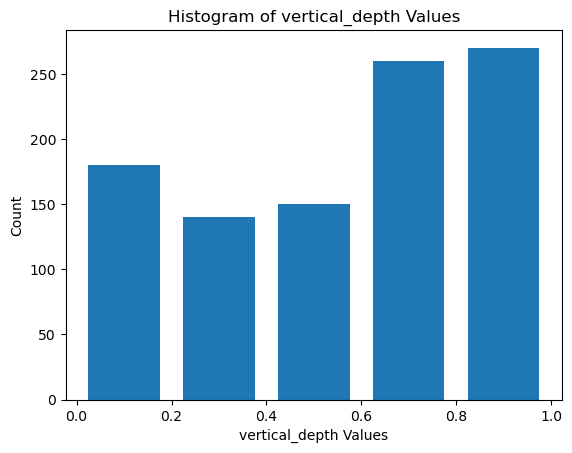

attribute: distance_depth


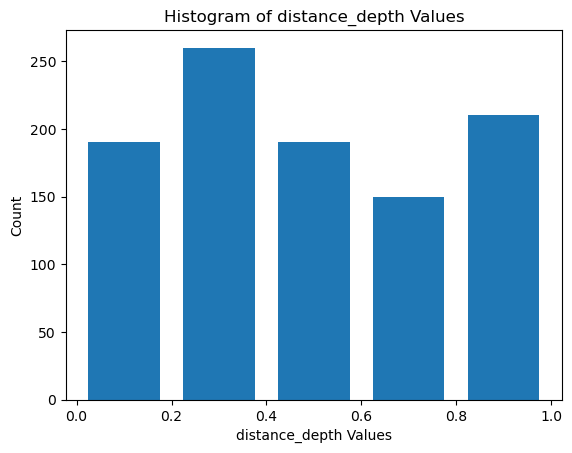

attribute: water_foaming


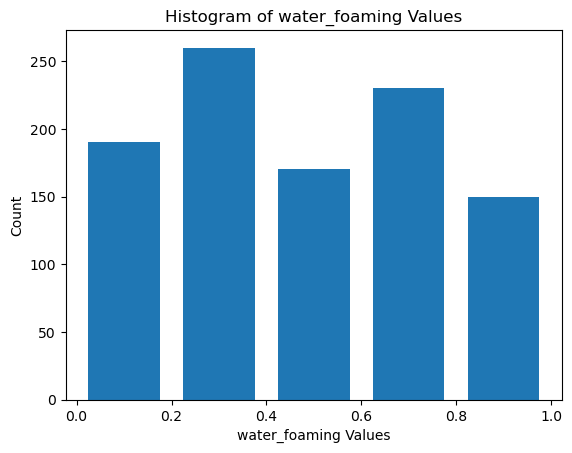

In [74]:
water_attributes = ['water_color', 'reflection_intensity', 'distortion', 'water_level', 'vertical_depth', 'distance_depth', 'water_foaming']
# attr = 'reflection_intensity'
for attr in water_attributes:
    print('attribute: ' + attr)
    annotations_for_attr = annotations_from_attribute(annotations, attr)
    create_bar_chart(annotations_for_attr, attr)

# annotations_for_attr = annotations_from_attribute(annotations, attr)
# create_bar_chart(annotations_for_attr, attr)

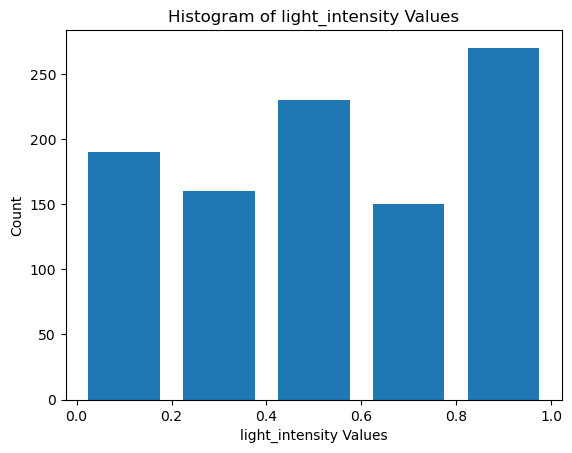

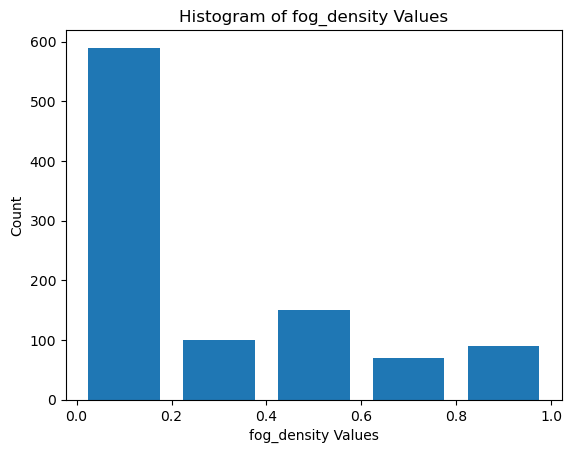

In [31]:
environment_attributes = ['light_intensity', 'fog_density']
for attr in environment_attributes:
    annotations_for_attr = annotations_from_attribute(annotations, attr)
    create_bar_chart(annotations_for_attr, attr)

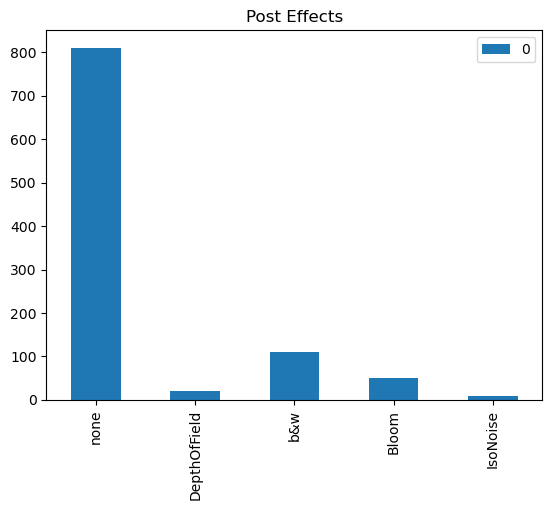

In [32]:
posteffect_attribute = 'post_effect'
annotations_refInt = annotations_from_attribute(annotations, posteffect_attribute)
create_bar_chart_posteffects(annotations_refInt, posteffect_attribute)

In [47]:
metrics = Metrics(data_root=data_root)
metrics_def = MetricDefinitions(data_root)
metrics_def.table
definition_dict = metrics_def.get_definition(def_id="water-attributes")
definition_dict

{'id': 'water-attributes',
 'name': 'water-attributes',
 'description': 'The attributes related to water'}

In [48]:
ann_def = AnnotationDefinitions(data_root)
ann_def.table

,id,name,description,format,spec
0,semantic segmentation,semantic segmentation,Generates a semantic segmentation image for ea...,PNG,"[{'label_name': 'background', 'pixel_value': {..."
1,NaN,NaN,NaN,NaN,NaN


In [49]:
definition_dict = ann_def.get_definition(def_id="semantic segmentation")